Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_imgs = np.load('train_images.npy')
train_labels = pd.read_csv('train_labels.csv')
test_imgs = np.load('test_images.npy')

<function matplotlib.pyplot.show(close=None, block=None)>

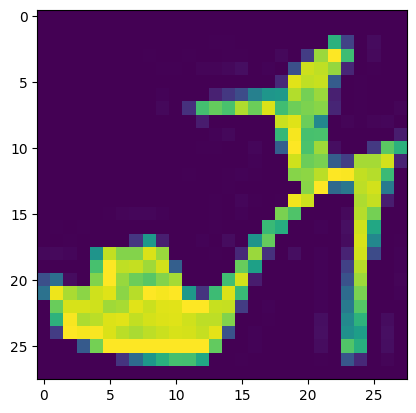

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_imgs[9,...])
plt.show

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


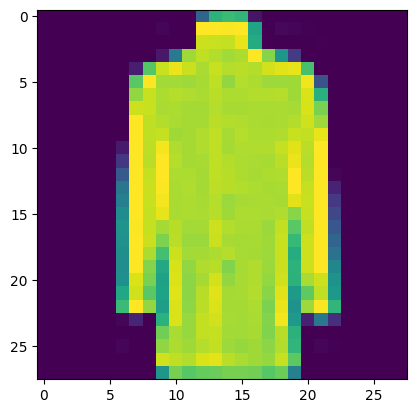

In [4]:
images = train_imgs  # array of images
categories = train_labels # array of categories

# Get the unique categories
unique_categories = np.unique(train_labels)

# Create a dictionary to store the datasets
datasets = {}

# Split the images into separate datasets based on categories
for category in unique_categories:
    # Find the indices of images belonging to the current category
    indices = np.where(categories == category)[0]
    
    # Extract the images for the current category
    category_images = images[indices]
    
    # Add the category images to the datasets dictionary
    datasets[category] = category_images

print(datasets.keys())

plt.imshow(datasets[4][6])

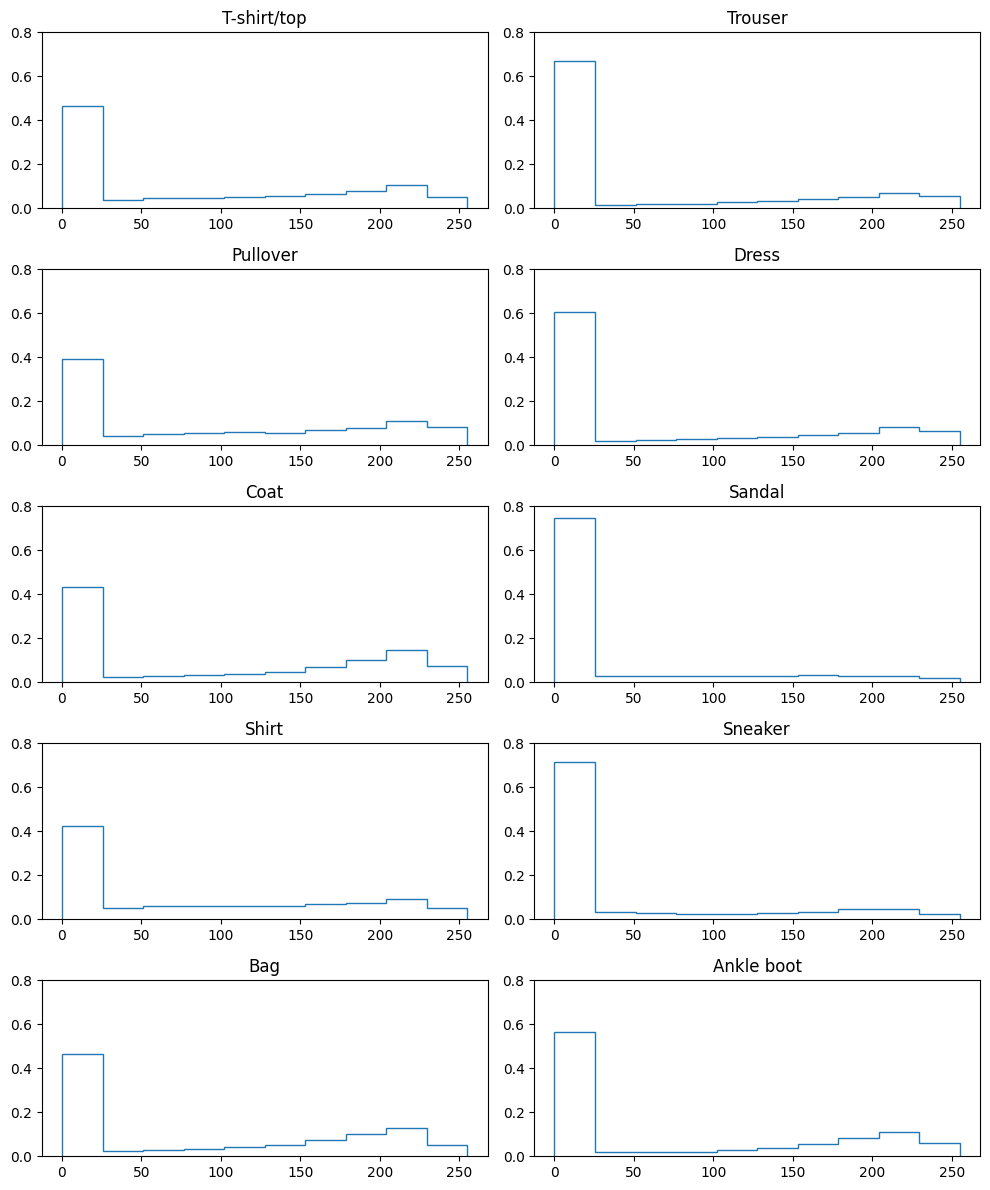

In [5]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 12))

keys = {
0:    'T-shirt/top',
1:    'Trouser',
2:    'Pullover',
3:    'Dress',
4:    'Coat',
5:    'Sandal',
6:    'Shirt',
7:    'Sneaker',
8:    'Bag',
9:    'Ankle boot'}

for ind, ax in enumerate(axes.flatten()):
  counts, bins = np.histogram(datasets[ind].flatten())
  ax.stairs(counts/datasets[ind].flatten().size, bins)
  ax.set_ylim([0,.8])
  ax.set_title(str(keys[ind]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

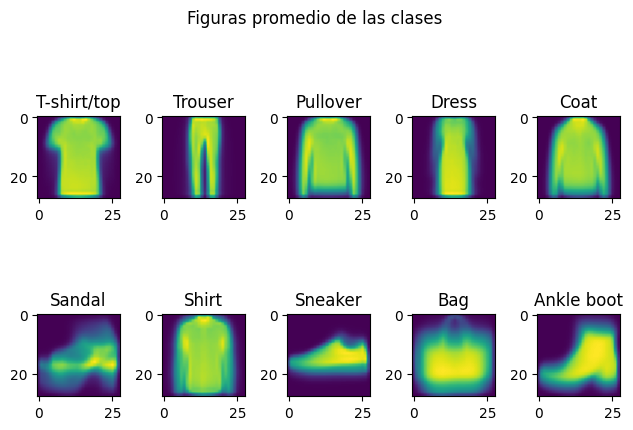

In [6]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5)

for ind, ax in enumerate(axes.flatten()):

  ax.imshow(np.average(datasets[ind], axis=0))
  ax.set_title(str(keys[ind]))

fig.suptitle('Figuras promedio de las clases')
# Adjust spacing between subplots
fig.tight_layout()
# Display the plot
plt.show()

Código Softmax

Código MLP


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.utils import np_utils
import keras.backend as K
from keras.utils import to_categorical
import keras
from tensorflow.keras.layers import BatchNormalization



In [17]:
from sklearn.model_selection import train_test_split

labels= np.array(train_labels['label'])
train_imgs = np.load('train_images.npy')
print(train_imgs.shape, labels.shape)
X_train, X_val, y_train, y_val = train_test_split(train_imgs, labels, test_size=0.1, random_state=50)



flipped = np.flip(X_train, axis=2)
X_train = np.concatenate((X_train, flipped), axis=0)
y_train = np.concatenate((y_train,y_train), axis=0)

X_val = X_val


y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)


(60000, 28, 28) (60000,)


In [9]:

X_train, X_val, y_train, y_val = train_test_split(train_imgs, labels, test_size=0.1, random_state=50)


X_train = X_train


X_val = X_val


y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)



Modelo MPL

In [42]:
output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(1000, activation='relu', kernel_initializer=normal_initializer, name='middle1'))
model.add(Dropout(0.2))
model.add(Dense(400, kernel_initializer=normal_initializer, name='middle2'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu', kernel_initializer=normal_initializer, name='middle3'))
model.add(Dropout(0.2))
model.add(Dense(output_size, activation='softmax',  kernel_initializer=normal_initializer, name='salida'))
model.summary()

import time
adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='four-hidden.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, 
          y_train_categorical ,
          epochs=100, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle1 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 middle2 (Dense)             (None, 400)               400400    
                                                                 
 batch_normalization_1 (Batc  (None, 400)              1600      
 hNormalization)                                        

In [55]:
output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(1048, activation='relu', kernel_initializer=normal_initializer))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initializer))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initializer))
model.add(Dropout(0.5))
model.add(Dense(output_size, activation='softmax',  kernel_initializer=normal_initializer, name='salida'))
model.summary()

import time
adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='four-hidden.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, 
          y_train_categorical ,
          epochs=100, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1048)              822680    
                                                                 
 dropout (Dropout)           (None, 1048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               537088    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [49]:
output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(1000, activation='relu', kernel_initializer=normal_initializer, name='middle0'))
model.add(Dropout(0.2))
model.add(Dense(1500, activation='relu', kernel_initializer=normal_initializer, name='middle1'))
model.add(Dropout(0.2))
model.add(Dense(400, kernel_initializer=normal_initializer, name='middle2'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu', kernel_initializer=normal_initializer, name='middle3'))
model.add(Dropout(0.2))
model.add(Dense(output_size, activation='softmax',  kernel_initializer=normal_initializer, name='salida'))
model.summary()

import time
adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='four-hidden.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(X_train, 
          y_train_categorical ,
          epochs=100, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )

#0.90800



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle0 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 middle1 (Dense)             (None, 1500)              1501500   
                                                                 
 dropout_1 (Dropout)         (None, 1500)              0         
                                                        

Modelo softmax

In [ ]:
output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(output_size, activation='softmax',  kernel_initializer=uniform_initializer, name='salida'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 salida (Dense)              (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [56]:

x_test = np.load('test_images.npy')
y_test = model.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)

313/313 [==============================] - 1s 2ms/step
